<a href="https://colab.research.google.com/github/Mehpara/Datasets/blob/main/DS2_BR%2C_CC%2C_LP%2C_GB_%2C_LR%2C_SVC%2C_SDG_%2C_classifiers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-multilearn
!pip install simplekml



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 2.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 768 kB/s 
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65876 sha256=ccdd4192d3f65e1ef55ce1b8da1fefdc731f17b6ad98df3f9ad3c93a68015a17
  Stored in directory: /root/.cache/pip/wheels/5c/ec/e6/10af1a1fb29ffca95151d4c886d6e06fc309c68f46519892de
Successfully built simplekml


In [3]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
#/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
import pandas.util.testing as tm
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split

# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
# Multi Label Pkgs

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [4]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/Multi_Label_Text_Classification_with_Skmultilearn/data/so_dataset_2_tags.csv")
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0.0,1.0


In [5]:
df.loc[0].title

'Flask-SQLAlchemy - When are the tables/databases created and destroyed?'

In [6]:
# Convert to Float
df['mysql'] = df['mysql'].astype(float)
df.dtypes

title      object
tags       object
mysql     float64
python    float64
php       float64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


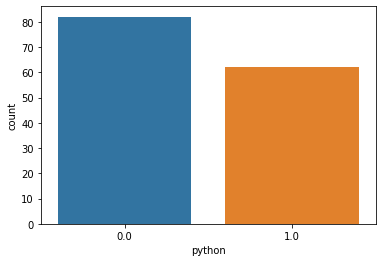

In [7]:
# Value Count 
sns.countplot(df['python'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


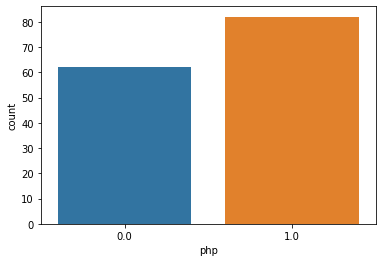

In [8]:
# Value Count 
sns.countplot(df['php'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


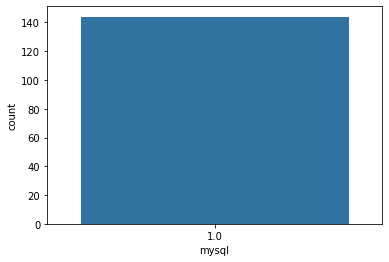

In [9]:
# Value Count 
sns.countplot(df['mysql'])

In [10]:
df['php'].value_counts()

1.0    82
0.0    62
Name: php, dtype: int64

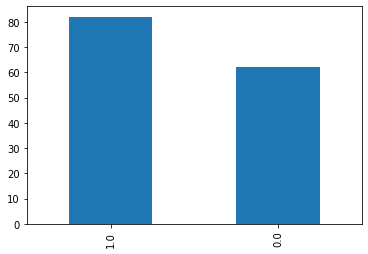

In [11]:
df['php'].value_counts().plot(kind='bar')

In [12]:
#Text Preprocessing    neattext : remove_stopwords  
!pip install neattext
import neattext as nt
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 2.1 MB/s 


In [13]:
# Explore For Noise
df['title'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 11.267605633802818, 'text_lengt...
1      {'text_noise': 4.651162790697675, 'text_length...
2      {'text_noise': 9.90990990990991, 'text_length'...
3      {'text_noise': 8.47457627118644, 'text_length'...
4      {'text_noise': 2.631578947368421, 'text_length...
                             ...                        
139    {'text_noise': 26.41509433962264, 'text_length...
140    {'text_noise': 3.8461538461538463, 'text_lengt...
141    {'text_noise': 6.666666666666667, 'text_length...
142    {'text_noise': 13.636363636363635, 'text_lengt...
143    {'text_noise': 7.142857142857142, 'text_length...
Name: title, Length: 144, dtype: object

In [14]:
# Explore For Noise
df['title'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [when, are, the, and]
1                                           [two, for]
2                    [the, of, that, a, and, the, and]
3                                    [in, a, and, and]
4                                              [using]
                            ...                       
139                                 [where, in, using]
140                                               [to]
141                                  [and, get, using]
142    [how, to, the, of, a, with, a, back, into, the]
143                                           [in, if]
Name: title, Length: 144, dtype: object

In [15]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [16]:
# Explore For Noise
df['title'].apply(nfx.remove_stopwords)

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

In [17]:
corpus = df['title'].apply(nfx.remove_stopwords)

In [18]:
tfidf = TfidfVectorizer()
tfidf

TfidfVectorizer()

In [19]:
# Build Features
Xfeatures = tfidf.fit_transform(corpus).toarray()
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1.0,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1.0,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1.0,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1.0,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1.0,0.0,1.0


In [21]:
y = df[['mysql', 'python', 'php']]

In [22]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

In [23]:
print(df['title'].shape)
print(X_train.shape)

(144,)
(100, 404)


In [24]:
# Building Our Model
# Estimator + Multilabel Estimator
### Problem Transform
import skmultilearn

In [25]:
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

In [26]:
# Convert Our Multi-Label Prob to Multi-Class

binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_rel_clf.fit(X_train,y_train)


BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [27]:
BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None,fit_prior=True),require_dense=[True, True])

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [28]:
# Predictions
br_prediction = binary_rel_clf.predict(X_test)
br_prediction

<44x3 sparse matrix of type '<class 'numpy.float64'>'
	with 88 stored elements in Compressed Sparse Column format>

In [29]:
# Convert to Array  To See Result
br_prediction.toarray()

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [30]:
# Accuracy
accuracy_score(y_test,br_prediction)




0.9090909090909091

In [31]:
# Hamming Loss :Incorrect Predictions
# The Lower the result the better
hamming_loss(y_test,br_prediction)

0.06060606060606061

In [32]:
#f1 score:
print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test,br_prediction, average='macro'))


f1 score:
micro
0.9545454545454546
macro
0.9373219373219372


In [33]:
#precision :
print("precision:")
print("micro")
print(precision_score(y_test,br_prediction, average='micro'))
print("macro")
print(precision_score(y_test,br_prediction, average='macro'))



precision:
micro
0.9545454545454546
macro
0.943355119825708


In [34]:
#Recall:
print("recall:")
print("micro")
print(recall_score(y_test,br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))


recall:
micro
0.9545454545454546
macro
0.9340350877192982


In [55]:
#Classifier Chains
#Preserve Label Correlation
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy & Hamming Loss
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)


    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [56]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)

In [52]:
clf_chain_model

{'accuracy:': 0.8409090909090909, 'hamming_score': 0.10606060606060606}

In [57]:
#Classifier chain Model building to get results of F1score ,Precison ,Recall
classifier_chain_clf = ClassifierChain(MultinomialNB())
classifier_chain_clf.fit(X_train,y_train)

ClassifierChain(classifier=MultinomialNB(), require_dense=[True, True])

In [58]:
# Predictions
br_prediction = classifier_chain_clf.predict(X_test)
br_prediction

<44x3 sparse matrix of type '<class 'numpy.float64'>'
	with 88 stored elements in Compressed Sparse Column format>

In [59]:
# Convert to Array  To See Result
br_prediction.toarray()

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [60]:
#f1 score:
print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test,br_prediction, average='macro'))


f1 score:
micro
0.9204545454545455
macro
0.8868686868686869


In [61]:
#precision :
print("precision:")
print("micro")
print(precision_score(y_test,br_prediction, average='micro'))
print("macro")
print(precision_score(y_test,br_prediction, average='macro'))



precision:
micro
0.9204545454545454
macro
0.9095238095238095


In [62]:
#Recall:
print("recall:")
print("micro")
print(recall_score(y_test,br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))


recall:
micro
0.9204545454545454
macro
0.8814035087719297


In [63]:
#Label Powerset

clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)

In [64]:
clf_labelP_model

{'accuracy:': 0.9090909090909091, 'hamming_score': 0.06060606060606061}

In [65]:
#Classifier chain Model building to get results of F1score ,Precison ,Recall
label_powerset_clf = LabelPowerset(MultinomialNB())
label_powerset_clf.fit(X_train,y_train)

LabelPowerset(classifier=MultinomialNB(), require_dense=[True, True])

In [66]:
# Predictions
br_prediction = classifier_chain_clf.predict(X_test)
br_prediction

<44x3 sparse matrix of type '<class 'numpy.float64'>'
	with 88 stored elements in Compressed Sparse Column format>

In [67]:
# Convert to Array  To See Result
br_prediction.toarray()

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [68]:
#f1 score:
print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test,br_prediction, average='macro'))


f1 score:
micro
0.9204545454545455
macro
0.8868686868686869


In [69]:
#precision :
print("precision:")
print("micro")
print(precision_score(y_test,br_prediction, average='micro'))
print("macro")
print(precision_score(y_test,br_prediction, average='macro'))


precision:
micro
0.9204545454545454
macro
0.9095238095238095


In [70]:
#Recall:
print("recall:")
print("micro")
print(recall_score(y_test,br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))


recall:
micro
0.9204545454545454
macro
0.8814035087719297


In [71]:
#BUILD MODEL
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from skmultilearn.adapt import MLkNN
from sklearn.datasets import make_hastie_10_2
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.913

In [72]:
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)


print("hamming loss: ")
print(hamming_loss(y_test, y_pred))

print("accuracy:")
print(accuracy_score(y_test, y_pred))

print("f1 score:")
print("micro")
print(f1_score(y_test, y_pred, average='micro'))
print("macro")
print(f1_score(y_test, y_pred, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, y_pred, average='micro'))
print("macro")
print(precision_score(y_test, y_pred, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, y_pred, average='micro'))
print("macro")
print(recall_score(y_test, y_pred, average='macro'))

hamming loss: 
0.087
accuracy:
0.913
f1 score:
micro
0.9130000000000001
macro
0.9129705353044326
precision:
micro
0.913
macro
0.9131689001281935
recall:
micro
0.913
macro
0.912907355622434


In [93]:
#Linear SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

In [95]:
#Linear SVC Model building to get results of F1score ,Precison ,Recall
linearSVC_clf = LinearSVC()
linearSVC_clf.fit(X_train,y_train)

LinearSVC()

In [96]:
# Predictions
br_prediction = linearSVC_clf.predict(X_test)
br_prediction

array([-1., -1., -1., ..., -1., -1.,  1.])

In [98]:
print("hamming loss: ")
print(hamming_loss(y_test, br_prediction))

print("accuracy:")
print(accuracy_score(y_test, br_prediction))

print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test, br_prediction, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, br_prediction, average='micro'))
print("macro")
print(precision_score(y_test, br_prediction, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))

hamming loss: 
0.4851
accuracy:
0.5149
f1 score:
micro
0.5149
macro
0.5081556283193222
precision:
micro
0.5149
macro
0.5145322149135703
recall:
micro
0.5149
macro
0.5138017655215608


In [80]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier


In [82]:
SGDClassifier_clf =SGDClassifier()
SGDClassifier_clf.fit(X_train,y_train)

SGDClassifier()

In [83]:
# Predictions
br_prediction = SGDClassifier_clf.predict(X_test)
br_prediction

array([-1.,  1.,  1., ..., -1., -1., -1.])

In [84]:
print("hamming loss: ")
print(hamming_loss(y_test, br_prediction))

print("accuracy:")
print(accuracy_score(y_test, br_prediction))

print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test, br_prediction, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, br_prediction, average='micro'))
print("macro")
print(precision_score(y_test, br_prediction, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))

hamming loss: 
0.4977
accuracy:
0.5023
f1 score:
micro
0.5023
macro
0.5014903755039523
precision:
micro
0.5023
macro
0.501962919408343
recall:
micro
0.5023
macro
0.5019532675918196


In [85]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression




In [86]:
LogisticRegression_clf =LogisticRegression(solver='lbfgs')
LogisticRegression_clf.fit(X_train,y_train)

LogisticRegression()

In [87]:
# Predictions
br_prediction = LogisticRegression_clf.predict(X_test)
br_prediction

array([-1., -1., -1., ..., -1., -1.,  1.])

In [88]:
print("hamming loss: ")
print(hamming_loss(y_test, br_prediction))

print("accuracy:")
print(accuracy_score(y_test, br_prediction))

print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test, br_prediction, average='macro'))

print("precision:")
print("micro")
print(precision_score(y_test, br_prediction, average='micro'))
print("macro")
print(precision_score(y_test, br_prediction, average='macro'))

print("recall:")
print("micro")
print(recall_score(y_test, br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))

hamming loss: 
0.4852
accuracy:
0.5148
f1 score:
micro
0.5148
macro
0.5080425511964259
precision:
micro
0.5148
macro
0.5144272446655109
recall:
micro
0.5148
macro
0.5137007758225101
